In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [128]:
df = pd.read_csv('stock_prices.csv')
df.head()

,date,ticker,open,high,low,close,adjusted_close,volume,sector
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
1,2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
3,2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics


In [129]:
print(pd.unique(df['ticker']))

['AAPL' 'ABBV' 'ABT' 'ACN' 'ADBE' 'AMD' 'AMGN' 'AMZN' 'AVGO' 'BAC' 'CAT'
 'CMCSA' 'COP' 'COST' 'CRM' 'CSCO' 'CVX' 'DHR' 'DIS' 'GOOG' 'GOOGL' 'HD'
 'JNJ' 'JPM' 'KO' 'LIN' 'LLY' 'MA' 'MCD' 'META' 'MRK' 'MS' 'MSFT' 'NFLX'
 'NKE' 'NVDA' 'ORCL' 'PEP' 'PFE' 'PG' 'PM' 'TMO' 'TMUS' 'TSLA' 'TXN' 'UNH'
 'UPS' 'V' 'WFC' 'WMT' 'XOM']


In [130]:
df['date'] = pd.to_datetime(df['date'])

In [131]:
df['date'][0].weekday() # Thursday

3

In [132]:
df['date'][0].year

2014

In [133]:
apple_stocks = df[df['ticker'] == 'AAPL']

In [134]:
apple_stocks['ticker'].value_counts()

ticker
AAPL    2726
Name: count, dtype: int64

In [135]:
apple_stocks.set_index('date', inplace=True) # creates a new dataframe by default so use inplace

In [136]:
apple_stocks.head()

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics


In [137]:
# access feb 3, 2020
apple_stocks.loc['2020-02-03']

ticker                   AAPL
open                   76.075
high                  78.3725
low                    75.555
close                  77.165
adjusted_close       74.89244
volume              173788400
sector            Electronics
Name: 2020-02-03 00:00:00, dtype: object

In [138]:
# select february
apple_stocks_feb_2020 = apple_stocks.loc['2020-02-01':'2020-02-28']
apple_stocks_feb_2020

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2020-02-03,AAPL,76.0750,78.3725,75.5550,77.1650,74.892440,173788400,Electronics
2020-02-04,AAPL,78.8275,79.9100,78.4075,79.7125,77.364890,136616400,Electronics
2020-02-05,AAPL,80.8800,81.1900,79.7375,80.3625,77.995760,118826800,Electronics
2020-02-06,AAPL,80.6425,81.3050,80.0650,81.3025,78.908070,105425600,Electronics
2020-02-07,AAPL,80.5925,80.8500,79.5000,80.0075,77.835510,117684000,Electronics
2020-02-10,AAPL,78.5450,80.3875,78.4625,80.3875,78.205185,109348800,Electronics
2020-02-11,AAPL,80.9000,80.9750,79.6775,79.9025,77.733350,94323200,Electronics
2020-02-12,AAPL,80.3675,81.8050,80.3675,81.8000,79.579340,113730400,Electronics
2020-02-13,AAPL,81.0475,81.5550,80.8375,81.2175,79.012650,94747600,Electronics


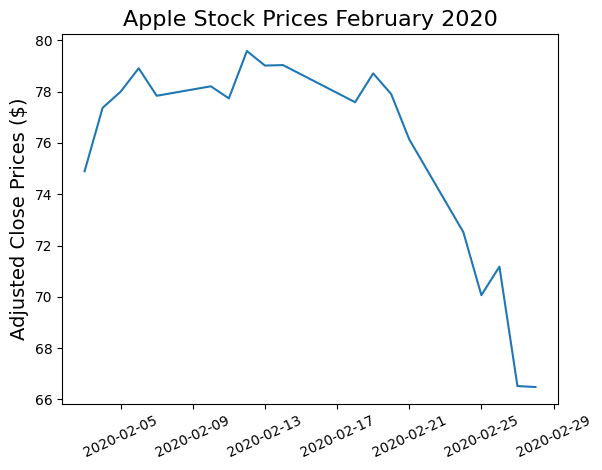

In [139]:
sns.lineplot(apple_stocks_feb_2020['adjusted_close'])
plt.title('Apple Stock Prices February 2020', fontsize=16)
plt.xlabel('')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.xticks(rotation=25)
plt.show()

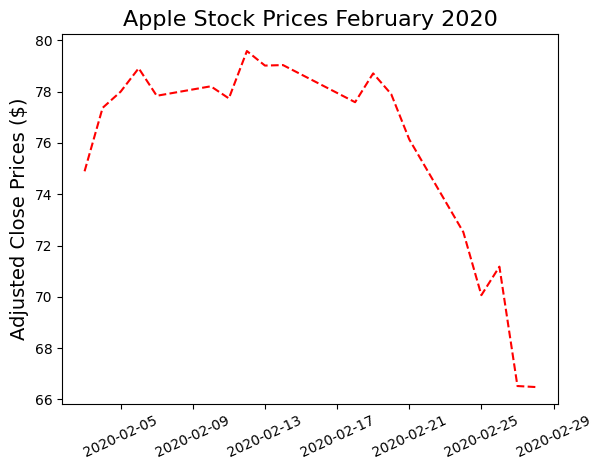

In [140]:
sns.lineplot(apple_stocks_feb_2020['adjusted_close'], color='red', linestyle='--')
plt.title('Apple Stock Prices February 2020', fontsize=16)
plt.xlabel('')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.xticks(rotation=25)
plt.show()

In [141]:
apple_stocks_jan_2020 = apple_stocks.loc['2020-01-01': '2020-01-31']
apple_stocks_jan_2020

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2020-01-02,AAPL,74.0600,75.1500,73.7975,75.0875,72.876114,135480400,Electronics
2020-01-03,AAPL,74.2875,75.1450,74.1250,74.3575,72.167610,146322800,Electronics
2020-01-06,AAPL,73.4475,74.9900,73.1875,74.9500,72.742650,118387200,Electronics
2020-01-07,AAPL,74.9600,75.2250,74.3700,74.5975,72.400536,108872000,Electronics
2020-01-08,AAPL,74.2900,76.1100,74.2900,75.7975,73.565210,132079200,Electronics
2020-01-09,AAPL,76.8100,77.6075,76.5500,77.4075,75.127790,170108400,Electronics
2020-01-10,AAPL,77.6500,78.1675,77.0625,77.5825,75.297640,140644800,Electronics
2020-01-13,AAPL,77.9100,79.2675,77.7875,79.2400,76.906320,121532000,Electronics
2020-01-14,AAPL,79.1750,79.3925,78.0425,78.1700,75.867830,161954400,Electronics


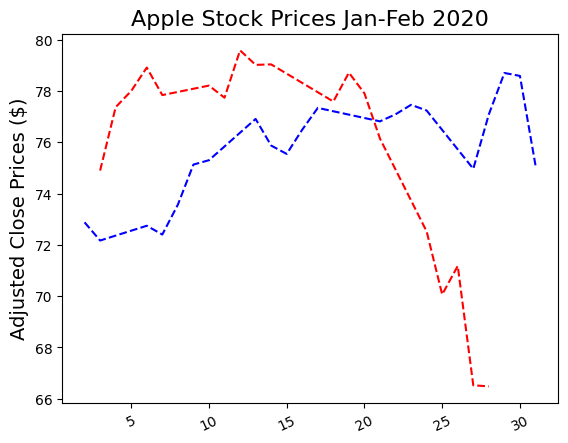

In [142]:
sns.lineplot(x=apple_stocks_jan_2020.index.day, y=apple_stocks_jan_2020['adjusted_close'], color='blue', linestyle='--')
sns.lineplot(x=apple_stocks_feb_2020.index.day, y=apple_stocks_feb_2020['adjusted_close'], color='red', linestyle='--')
plt.title('Apple Stock Prices Jan-Feb 2020', fontsize=16)
plt.xlabel('')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.xticks(rotation=25)
plt.show()

In [143]:
apple_stocks_mar_2020 = apple_stocks.loc['2020-03-01':'2020-03-31']
apple_stocks_mar_2020

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2020-03-02,AAPL,70.5700,75.3600,69.4300,74.7025,72.674510,341397200,Electronics
2020-03-03,AAPL,75.9175,76.0000,71.4500,72.3300,70.366420,319475600,Electronics
2020-03-04,AAPL,74.1100,75.8500,73.2825,75.6850,73.630350,219178400,Electronics
2020-03-05,AAPL,73.8800,74.8875,72.8525,73.2300,71.241990,187572800,Electronics
2020-03-06,AAPL,70.5000,72.7050,70.3075,72.2575,70.295910,226176800,Electronics
2020-03-09,AAPL,65.9375,69.5225,65.7500,66.5425,64.736046,286744800,Electronics
2020-03-10,AAPL,69.2850,71.6100,67.3425,71.3350,69.398430,285290000,Electronics
2020-03-11,AAPL,69.3475,70.3050,67.9650,68.8575,66.988180,255598800,Electronics
2020-03-12,AAPL,63.9850,67.5000,62.0000,62.0575,60.372800,418474000,Electronics


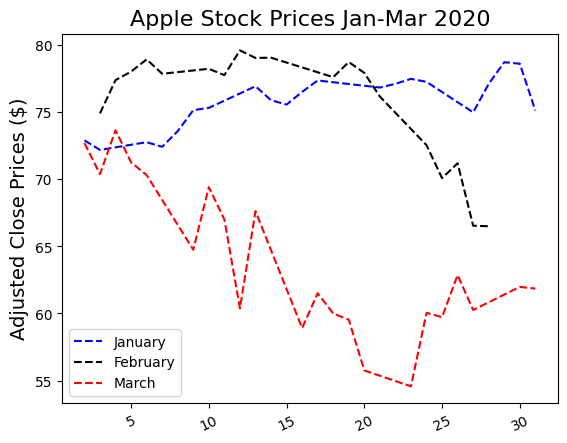

In [144]:
sns.lineplot(x=apple_stocks_jan_2020.index.day, y=apple_stocks_jan_2020['adjusted_close'], color='blue', linestyle='--', label='January')
sns.lineplot(x=apple_stocks_feb_2020.index.day, y=apple_stocks_feb_2020['adjusted_close'], color='black', linestyle='--', label='February')
sns.lineplot(x=apple_stocks_mar_2020.index.day, y=apple_stocks_mar_2020['adjusted_close'], color='red', linestyle='--',label='March')
plt.title('Apple Stock Prices Jan-Mar 2020', fontsize=16)
plt.xlabel('')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.xticks(rotation=25)
plt.show()

In [145]:
# Set up Amazon Stocks
amazon_stocks = df[df['ticker'] == 'AMZN']
amazon_stocks.set_index('date', inplace=True)
amazon_stocks

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2014-01-02,AMZN,19.9400,19.9680,19.7010,19.8985,19.8985,42756000,Retail
2014-01-03,AMZN,19.9145,20.1355,19.8110,19.8220,19.8220,44204000,Retail
2014-01-06,AMZN,19.7925,19.8500,19.4210,19.6815,19.6815,63412000,Retail
2014-01-07,AMZN,19.7520,19.9235,19.7145,19.9015,19.9015,38320000,Retail
2014-01-08,AMZN,19.9235,20.1500,19.8020,20.0960,20.0960,46330000,Retail
...,...,...,...,...,...,...,...,...
2024-10-24,AMZN,185.2500,187.1100,183.8600,186.3800,186.3800,21647400,Retail
2024-10-25,AMZN,187.8500,190.4500,187.5300,187.8300,187.8300,29362100,Retail
2024-10-28,AMZN,189.5700,190.2100,188.2100,188.3900,188.3900,27930800,Retail


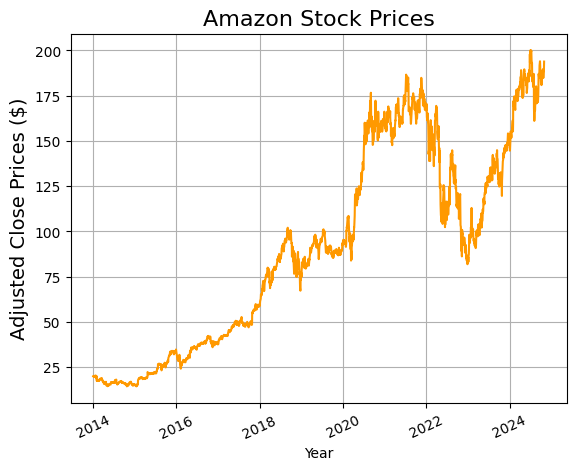

In [146]:
sns.lineplot(amazon_stocks['adjusted_close'], color='#FF9900')
plt.title('Amazon Stock Prices', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.grid()
plt.xticks(rotation=25)
plt.show()

In [147]:
import matplotlib.dates as mdates

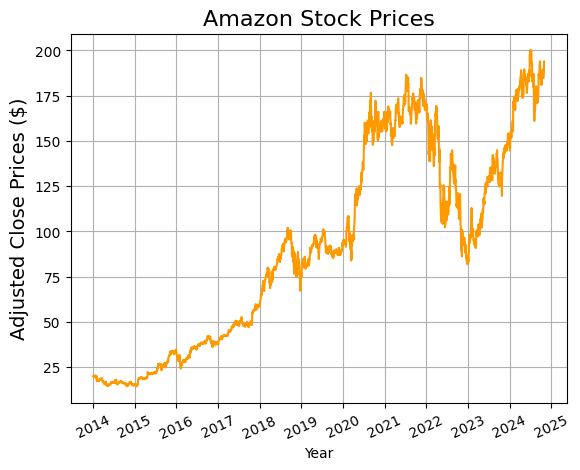

In [148]:
ax = sns.lineplot(amazon_stocks['adjusted_close'], color='#FF9900')
plt.title('Amazon Stock Prices', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.grid()
plt.xticks(rotation=25)

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.show()

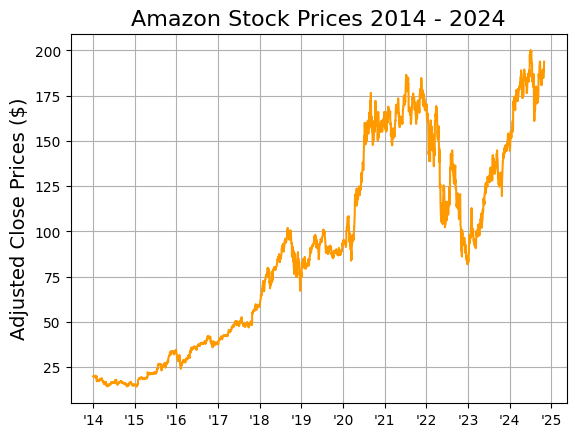

In [149]:
ax = sns.lineplot(amazon_stocks['adjusted_close'], color='#FF9900')
plt.title('Amazon Stock Prices 2014 - 2024', fontsize=16)
plt.xlabel('')
plt.ylabel('Adjusted Close Prices ($)', fontsize=14)
plt.grid()
# plt.xticks(rotation=25)

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))

plt.show()

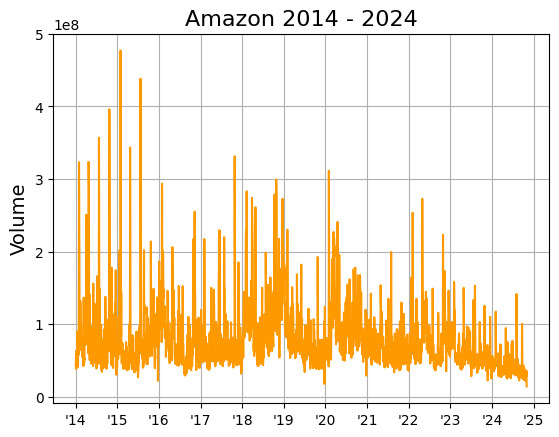

In [150]:
ax = sns.lineplot(amazon_stocks['volume'], color='#FF9900')
plt.title('Amazon 2014 - 2024', fontsize=16)
plt.xlabel('')
plt.ylabel('Volume', fontsize=14)
plt.grid()
# plt.xticks(rotation=25)

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))

plt.show()

In [151]:
# Calculate Moving Average
amazon_stocks['volume'].rolling(window=14) # two week moving average

Rolling [window=14,center=False,axis=0,method=single]

In [152]:
amazon_volume_14day = amazon_stocks['volume'].rolling(window=14).mean()

In [153]:
amazon_volume_14day[:14]

date
2014-01-02             NaN
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08             NaN
2014-01-09             NaN
2014-01-10             NaN
2014-01-13             NaN
2014-01-14             NaN
2014-01-15             NaN
2014-01-16             NaN
2014-01-17             NaN
2014-01-21             NaN
2014-01-22    5.240829e+07
Name: volume, dtype: float64

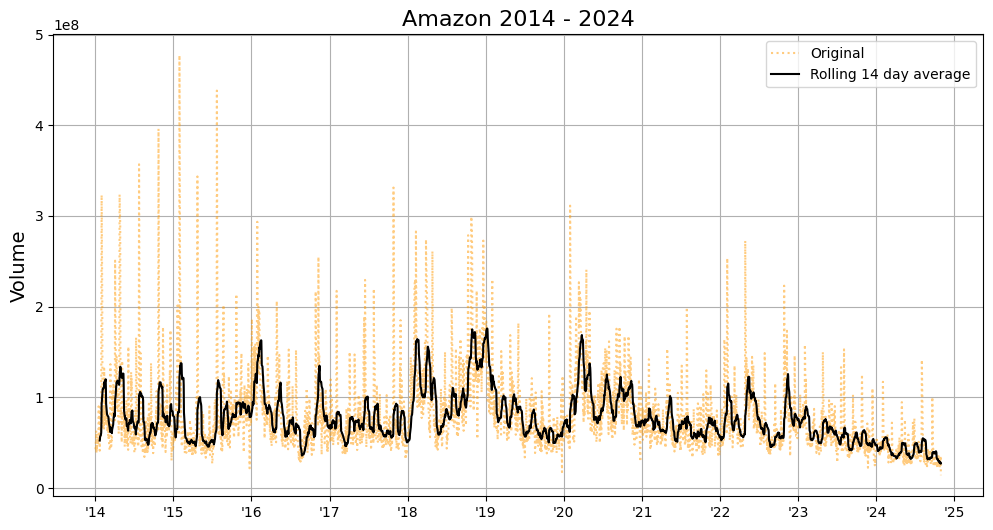

In [154]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(amazon_stocks['volume'], color='#FF9900', alpha=0.5, linestyle=':', label='Original')
sns.lineplot(amazon_volume_14day, color='black', label='Rolling 14 day average')
plt.title('Amazon 2014 - 2024', fontsize=16)
plt.xlabel('')
plt.ylabel('Volume', fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))

plt.show()

In [155]:
amazon_volume_90day = amazon_stocks['volume'].rolling(window=90).mean()

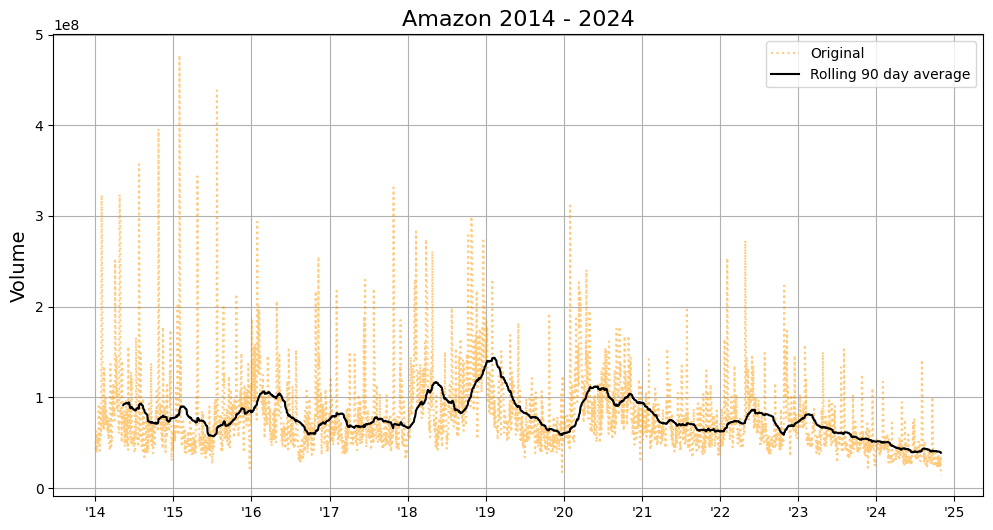

In [156]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(amazon_stocks['volume'], color='#FF9900', alpha=0.5, linestyle=':', label='Original')
# sns.lineplot(amazon_volume_14day, color='black', label='Rolling 14 day average')
sns.lineplot(amazon_volume_90day, color='black', label='Rolling 90 day average')

plt.title('Amazon 2014 - 2024', fontsize=16)
plt.xlabel('')
plt.ylabel('Volume', fontsize=14)
plt.grid()

# Adjust x-axis to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))

plt.show()

In [157]:
# Investigate adjusted close price
amazon_close_percent_change = amazon_stocks['adjusted_close'].pct_change() # fractional change

In [158]:
amazon_close_percent_change.head()

date
2014-01-02         NaN
2014-01-03   -0.003845
2014-01-06   -0.007088
2014-01-07    0.011178
2014-01-08    0.009773
Name: adjusted_close, dtype: float64

In [159]:
amazon_close_percent_change * 100

date
2014-01-02         NaN
2014-01-03   -0.384451
2014-01-06   -0.708808
2014-01-07    1.117801
2014-01-08    0.977313
                ...   
2024-10-24    0.904120
2024-10-25    0.777980
2024-10-28    0.298142
2024-10-29    1.295186
2024-10-30    1.551119
Name: adjusted_close, Length: 2726, dtype: float64

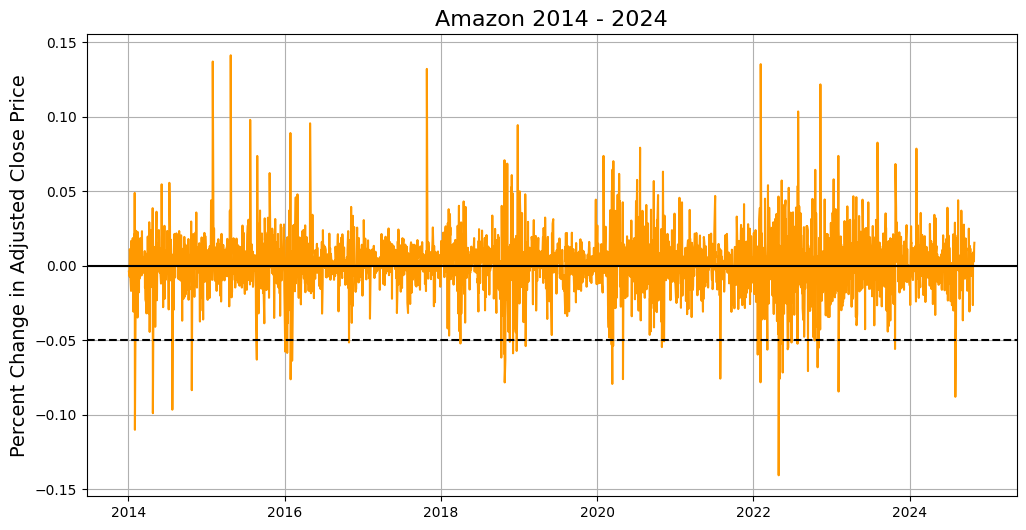

In [160]:
plt.figure(figsize=(12,6))

sns.lineplot(amazon_close_percent_change, color='#FF9900')
plt.axhline(y=0, color='black')
plt.axhline(y=-0.05, color='black', linestyle='--')
plt.title('Amazon 2014 - 2024', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Percent Change in Adjusted Close Price', fontsize=14)
plt.grid()

plt.show()

In [161]:
dips = amazon_close_percent_change[amazon_close_percent_change < -0.05]
dips.head()

date
2014-01-31   -0.109972
2014-04-25   -0.098828
2014-07-25   -0.096484
2014-10-24   -0.083403
2015-08-24   -0.062896
Name: adjusted_close, dtype: float64

In [162]:
dips.count()

np.int64(44)

In [163]:
dips.count() / len(amazon_stocks)

np.float64(0.016140865737344093)

In [164]:
dips.count() / amazon_stocks.count()

ticker            0.016141
open              0.016141
high              0.016141
low               0.016141
close             0.016141
adjusted_close    0.016141
volume            0.016141
sector            0.016141
dtype: float64

In [165]:
print(dips.index)

DatetimeIndex(['2014-01-31', '2014-04-25', '2014-07-25', '2014-10-24',
               '2015-08-24', '2016-01-04', '2016-01-13', '2016-01-29',
               '2016-02-05', '2016-10-28', '2018-04-02', '2018-10-10',
               '2018-10-24', '2018-10-26', '2018-10-29', '2018-11-19',
               '2018-12-04', '2018-12-21', '2019-02-01', '2020-03-09',
               '2020-03-12', '2020-03-16', '2020-05-01', '2020-10-30',
               '2020-11-09', '2021-07-30', '2022-01-21', '2022-02-03',
               '2022-03-07', '2022-04-29', '2022-05-05', '2022-05-09',
               '2022-05-18', '2022-06-10', '2022-06-13', '2022-06-28',
               '2022-07-26', '2022-09-13', '2022-10-14', '2022-10-28',
               '2022-11-01', '2023-02-03', '2023-10-25', '2024-08-02'],
              dtype='datetime64[ns]', name='date', freq=None)


In [166]:
netflix_stocks = df[df['ticker'] == 'NFLX']

In [167]:
netflix_stocks.set_index('date', inplace=True)
netflix_stocks.head()

,ticker,open,high,low,close,adjusted_close,volume,sector
date,,,,,,,,
2014-01-02,NFLX,52.401430,52.511430,51.542860,51.831430,51.831430,12325600,Tech Services
2014-01-03,NFLX,52.000000,52.495712,51.842857,51.871430,51.871430,10817100,Tech Services
2014-01-06,NFLX,51.890000,52.044285,50.475716,51.367140,51.367140,15501500,Tech Services
2014-01-07,NFLX,49.684284,49.698570,48.152860,48.500000,48.500000,36167600,Tech Services
2014-01-08,NFLX,48.104286,49.425713,48.074287,48.712856,48.712856,20001100,Tech Services


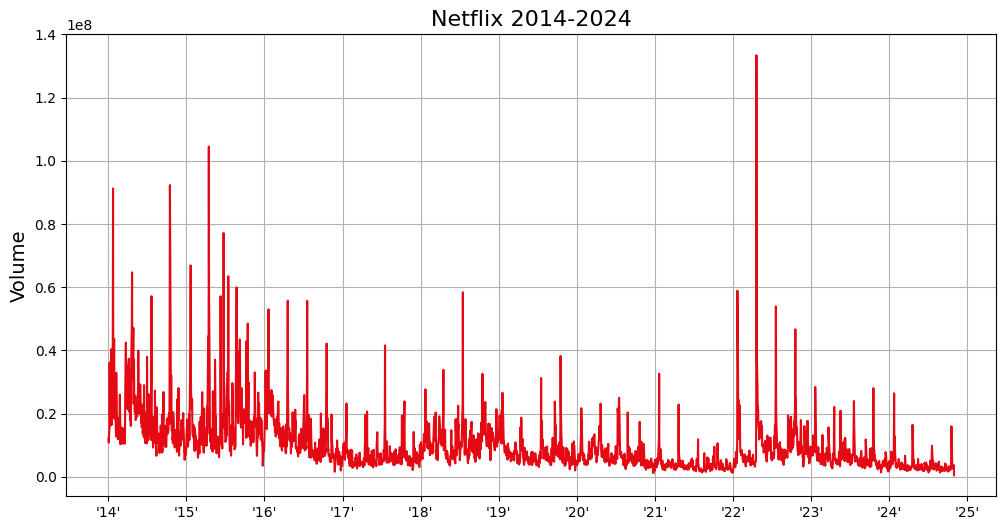

In [168]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(netflix_stocks['volume'], color='#E50914')

# adjust axes to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y'"))

plt.title('Netflix 2014-2024', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid()
plt.show()

In [169]:
netflix_stocks.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
      dtype='int32', name='date', length=2726)

In [170]:
print(pd.unique(netflix_stocks.index.month))

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [171]:
netflix_stocks['month'] = netflix_stocks.index.month

/tmp/ipykernel_92/1646975575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_stocks['month'] = netflix_stocks.index.month


In [172]:
netflix_stocks.head()

,ticker,open,high,low,close,adjusted_close,volume,sector,month
date,,,,,,,,,
2014-01-02,NFLX,52.401430,52.511430,51.542860,51.831430,51.831430,12325600,Tech Services,1
2014-01-03,NFLX,52.000000,52.495712,51.842857,51.871430,51.871430,10817100,Tech Services,1
2014-01-06,NFLX,51.890000,52.044285,50.475716,51.367140,51.367140,15501500,Tech Services,1
2014-01-07,NFLX,49.684284,49.698570,48.152860,48.500000,48.500000,36167600,Tech Services,1
2014-01-08,NFLX,48.104286,49.425713,48.074287,48.712856,48.712856,20001100,Tech Services,1


In [173]:
monthly_volume = netflix_stocks.groupby('month')['volume'].mean()
monthly_volume

month
1     1.410399e+07
2     8.827254e+06
3     8.982469e+06
4     1.337481e+07
5     9.103363e+06
6     9.102217e+06
7     1.152011e+07
8     7.832642e+06
9     8.806715e+06
10    1.215103e+07
11    7.902156e+06
12    7.617274e+06
Name: volume, dtype: float64

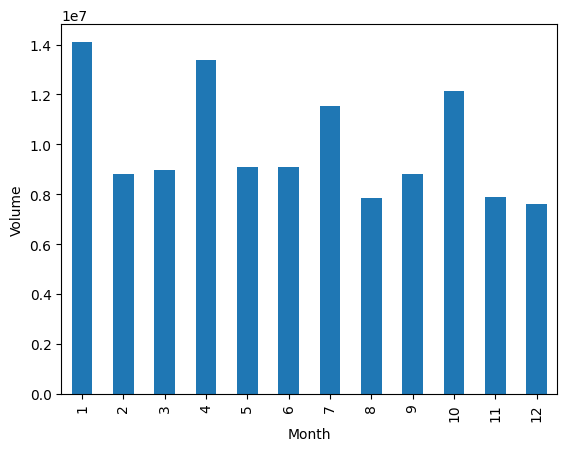

In [174]:
monthly_volume.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_92/3338599118.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(netflix_stocks, x='month', y='volume', palette=colors)


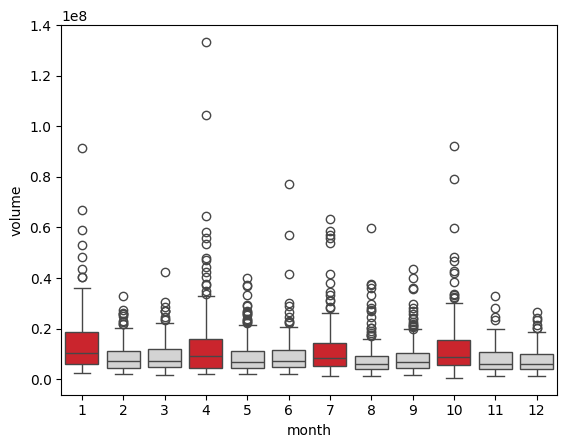

In [175]:
# Segmented boxplot
colors = [
    '#E50914', 'lightgray', 'lightgray',
    '#E50914', 'lightgray', 'lightgray',
    '#E50914', 'lightgray', 'lightgray',
    '#E50914', 'lightgray', 'lightgray'
]

sns.boxplot(netflix_stocks, x='month', y='volume', palette=colors)
plt.show()

/tmp/ipykernel_92/1636825513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(netflix_stocks, x='month', y='volume', palette=colors)


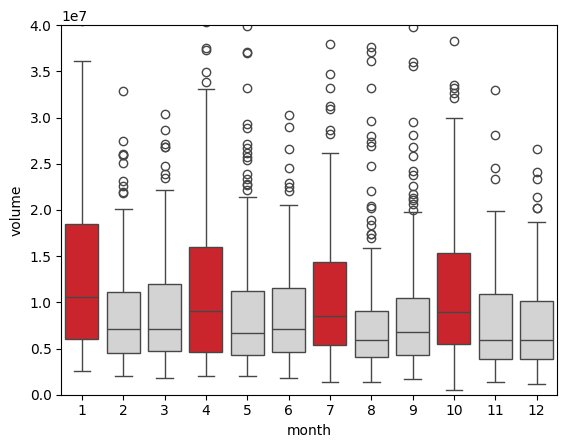

In [176]:
sns.boxplot(netflix_stocks, x='month', y='volume', palette=colors)
plt.ylim(0, 40000000)
plt.show()

In [177]:
df.head()

,date,ticker,open,high,low,close,adjusted_close,volume,sector
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
1,2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
3,2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics


In [178]:
# filter for one ticker
df[df['ticker'] == 'AAPL']

,date,ticker,open,high,low,close,adjusted_close,volume,sector
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.253258,234684800,Electronics
1,2014-01-03,AAPL,19.745000,19.775000,19.301071,19.320715,16.874273,392467600,Electronics
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.966291,412610800,Electronics
3,2014-01-07,AAPL,19.440000,19.498571,19.211430,19.287144,16.844955,317209200,Electronics
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.951628,258529600,Electronics
...,...,...,...,...,...,...,...,...,...
2721,2024-10-24,AAPL,229.980000,230.820000,228.410000,230.570000,230.570000,31109500,Electronics
2722,2024-10-25,AAPL,229.740000,233.220000,229.570000,231.410000,231.410000,38802300,Electronics
2723,2024-10-28,AAPL,233.320000,234.730000,232.550000,233.400000,233.400000,36087100,Electronics
2724,2024-10-29,AAPL,233.100000,234.330000,232.320000,233.670000,233.670000,35332800,Electronics


In [179]:
# Filter for multiple tickers
tickers = ['AAPL', 'AMZN', 'MSFT', 'NFLX', 'NKE']
selected_stocks = df[df['ticker'].isin(tickers)]

In [180]:
print(pd.unique(selected_stocks['ticker']))

['AAPL' 'AMZN' 'MSFT' 'NFLX' 'NKE']


In [181]:
selected_stocks.sample(10)

,date,ticker,open,high,low,close,adjusted_close,volume,sector
633,2016-07-08,AAPL,24.1225,24.2225,24.0125,24.1700,22.174150,115648400,Electronics
95216,2024-01-26,NKE,101.5700,103.2700,101.2200,102.7500,101.532770,9735800,Consumer Packaged Goods
88696,2019-10-28,MSFT,144.4000,145.6700,143.5100,144.1900,137.723100,35280100,Tech Services
1582,2020-04-16,AAPL,71.8450,72.0500,70.5875,71.6725,69.726776,157125200,Electronics
88329,2018-05-14,MSFT,97.9200,98.6900,97.3100,98.0300,91.435050,19454100,Tech Services
91341,2019-07-03,NFLX,376.6900,381.9900,375.8400,381.7200,381.720000,3799000,Tech Services
90996,2018-02-16,NFLX,278.7300,281.9600,275.6900,278.5200,278.520000,8312400,Tech Services
366,2015-06-17,AAPL,31.9300,31.9700,31.6850,31.8250,28.611197,131672400,Electronics
19616,2016-02-18,AMZN,27.0595,27.0600,26.1865,26.2500,26.250000,94700000,Retail
19243,2014-08-25,AMZN,16.6605,16.8385,16.6355,16.7010,16.701000,39154000,Retail


In [182]:
# interested in the adjusted_close for Apple and Amazon
# datetime     AAPL     AMZN
# 2018-08-02   100       85
# need to .pivot() your data

pivoted_stocks = selected_stocks.pivot(
    index='date',
    columns='ticker',
    values='adjusted_close'
)

In [183]:
pivoted_stocks.head()

ticker,AAPL,AMZN,MSFT,NFLX,NKE
date,,,,,
2014-01-02,17.253258,19.8985,31.120733,51.831430,34.626877
2014-01-03,16.874273,19.8220,30.911367,51.871430,34.533930
2014-01-06,16.966291,19.6815,30.258133,51.367140,34.268394
2014-01-07,16.844955,19.9015,30.492615,48.500000,34.294937
2014-01-08,16.951628,20.0960,29.948261,48.712856,34.117910


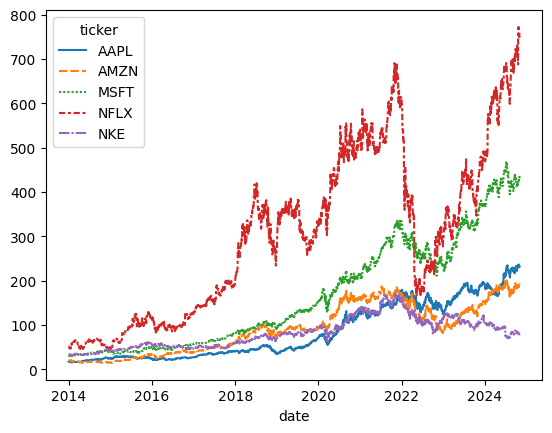

In [184]:
sns.lineplot(pivoted_stocks)
plt.show()

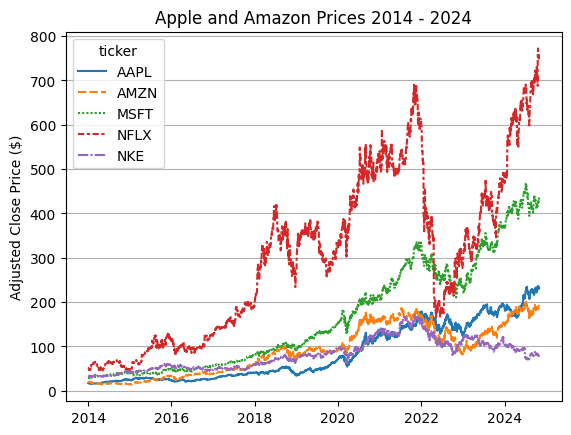

In [185]:
sns.lineplot(pivoted_stocks)
plt.xlabel('')
plt.ylabel('Adjusted Close Price ($)')
plt.title('Apple and Amazon Prices 2014 - 2024')
plt.grid(axis='y')
plt.show()

In [186]:
nike_stocks = df[ df["ticker"] == "NKE"]
nike_stocks.set_index(nike_stocks["date"], inplace=True)

# Create weekly Nike stock time series
nike_stocks.resample("W")

In [187]:
# Select only numeric columns
numeric_data = nike_stocks.select_dtypes(include='number')

# Resample and calculate the mean
nike_weekly = numeric_data.resample("W").mean()

In [188]:
numeric_data

,open,high,low,close,adjusted_close,volume
date,,,,,,
2014-01-02,39.075,39.415,38.965,39.1200,34.626877,5318600
2014-01-03,39.075,39.315,38.980,39.0150,34.533930,5597000
2014-01-06,39.235,39.300,38.705,38.7150,34.268394,6045800
2014-01-07,38.855,39.000,38.705,38.7450,34.294937,6769000
2014-01-08,38.750,38.975,38.465,38.5450,34.117910,6897800
...,...,...,...,...,...,...
2024-10-24,80.500,80.800,79.030,79.0400,79.040000,7424500
2024-10-25,79.220,79.580,78.520,78.8500,78.850000,9385400
2024-10-28,79.320,79.640,78.820,78.9100,78.910000,6617200


In [189]:
nike_weekly

,open,high,low,close,adjusted_close,volume
date,,,,,,
2014-01-05,39.075000,39.365000,38.972500,39.067500,34.580404,5457800.0
2014-01-12,38.810000,38.936000,38.521000,38.602000,34.168365,6216760.0
2014-01-19,37.701000,37.811000,37.252000,37.396000,33.100880,7324600.0
2014-01-26,36.675000,36.812500,36.321250,36.453750,32.266854,9822050.0
2014-02-02,36.195000,36.549000,36.012000,36.317000,32.145812,10012000.0
...,...,...,...,...,...,...
2024-10-06,85.124000,86.388000,84.258000,84.996000,84.996000,18865140.0
2024-10-13,81.894000,82.508000,80.860000,81.660000,81.660000,10725780.0
2024-10-20,82.616000,83.512000,81.982000,82.796000,82.796000,9524400.0
